In [1]:
import pandas as pd
features = pd.read_csv('temps.csv')
print(features.head(5))

   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  


In [2]:
print(features.shape)

(348, 12)


In [3]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [4]:
import datetime
years=features['year']
months=features['month']
days=features['day']
dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year,month,day in zip(years,months,days)]
# print(dates)
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

In [5]:
#准备画图
import matplotlib.pyplot as plt
%matplotlib inline
#指定默认风格
plt.style.use('fivethirtyeight')

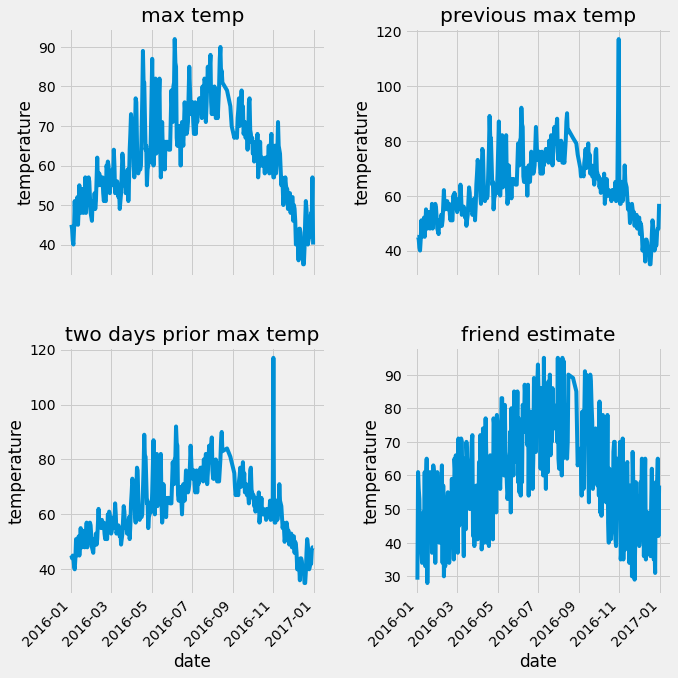

In [6]:
#设置布局
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation=45)
#标签值
ax1.plot(dates,features['actual'])
ax1.set_xlabel(' ');ax1.set_ylabel('temperature');ax1.set_title('max temp')
#昨天的最高温度值
ax2.plot(dates,features['temp_1'])
ax2.set_xlabel(' ');ax2.set_ylabel('temperature');ax2.set_title('previous max temp')
#前天的最高温度值
ax3.plot(dates,features['temp_2'])
ax3.set_xlabel('date');ax3.set_ylabel('temperature');ax3.set_title('two days prior max temp')
#朋友预测的最高温度值
ax4.plot(dates,features['friend'])
ax4.set_xlabel('date');ax4.set_ylabel('temperature');ax4.set_title('friend estimate')
plt.tight_layout(pad=2)

In [7]:
#独热编码
features=pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [8]:
#数据与标签
import numpy as np
#标签
labels=np.array(features['actual'])
#在特征中去掉标签
features=features.drop('actual',axis=1)
#名字单独保存，以备后患
feature_list=list(features.columns)
#转换成合适的格式
features=np.array(features)

In [9]:
#数据集切分
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.25,random_state=42)
print('训练集特征',train_features.shape)
print('训练集标签',train_labels.shape)
print('测试集特征',test_features.shape)
print('测试集标签',test_labels.shape)

训练集特征 (261, 17)
训练集标签 (261,)
测试集特征 (87, 17)
测试集标签 (87,)


In [10]:
#随机森林回归模型
#导入算法
from sklearn.ensemble import RandomForestRegressor
#建模
rf=RandomForestRegressor(n_estimators=1000,random_state=42)
#训练
rf.fit(train_features,train_labels)
#预测结果
predictions=rf.predict(test_features)
#计算误差
errors=abs(predictions-test_labels)
#mean absolute percentage error(MAPE) 平均绝对百分误差
mape=100*(errors/test_labels)
print('MAPE:',np.mean(mape))

MAPE: 6.0674679200022945


In [11]:
predictions

array([69.857, 61.319, 51.891, 61.321, 66.463, 70.162, 78.848, 75.786,
       62.121, 74.078, 63.647, 72.176, 38.472, 62.433, 71.594, 56.012,
       60.943, 56.995, 56.748, 76.113, 63.758, 54.401, 66.493, 62.468,
       58.786, 53.032, 66.769, 46.448, 62.122, 80.176, 73.833, 64.313,
       55.188, 81.972, 74.178, 61.695, 53.636, 51.424, 68.929, 42.452,
       70.385, 57.373, 76.172, 42.396, 61.098, 74.08 , 52.745, 81.369,
       53.325, 42.487, 46.507, 42.144, 64.17 , 65.709, 74.13 , 61.339,
       55.177, 59.945, 54.651, 59.664, 65.491, 50.052, 60.849, 70.188,
       60.062, 59.236, 71.743, 69.796, 76.83 , 41.32 , 76.868, 56.783,
       60.378, 50.519, 54.426, 64.003, 43.711, 74.354, 47.306, 52.326,
       53.526, 68.21 , 73.607, 72.658, 63.243, 57.175, 46.04 ])

In [11]:
#得到特征重要性
importances=list(rf.feature_importances_)
# print(importances)
#转换格式
feature_importances=[(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]
#排序
feature_importances=sorted(feature_importances,key=lambda x:x[1],reverse=True)
#对应进行打印
[print('Variable:{:20} Importance:{}'.format(*pair)) for pair in feature_importances]

Variable:temp_1               Importance:0.66
Variable:average              Importance:0.15
Variable:forecast_noaa        Importance:0.05
Variable:forecast_acc         Importance:0.03
Variable:day                  Importance:0.02
Variable:temp_2               Importance:0.02
Variable:forecast_under       Importance:0.02
Variable:friend               Importance:0.02
Variable:month                Importance:0.01
Variable:year                 Importance:0.0
Variable:week_Fri             Importance:0.0
Variable:week_Mon             Importance:0.0
Variable:week_Sat             Importance:0.0
Variable:week_Sun             Importance:0.0
Variable:week_Thurs           Importance:0.0
Variable:week_Tues            Importance:0.0
Variable:week_Wed             Importance:0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Variable Importance')

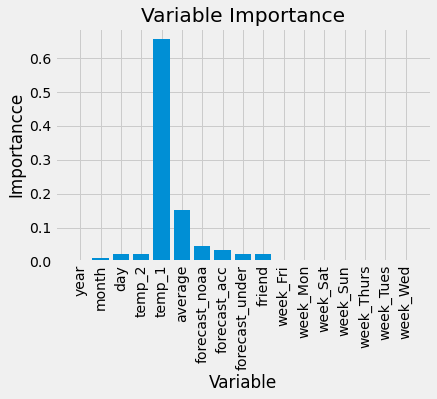

In [14]:
#转换成list格式
x_values=list(range(len(importances)))
#绘图
plt.bar(x_values,importances,orientation='vertical')
#x轴名字
plt.xticks(x_values,feature_list,rotation='vertical')
#图题
plt.xlabel('Variable')
plt.ylabel('Importancce')
plt.title('Variable Importance')

In [23]:
#选择最重要的两个特征来试
rf_most_important=RandomForestRegressor(n_estimators=1000,random_state=42)
#拿到这两个特征
important_indices=[feature_list.index('temp_1'),feature_list.index('average')]
train_important=train_features[:,important_indices]
test_important=test_features[:,important_indices]
#重新训练模型
rf_most_important.fit(train_important,train_labels)
#预测结果
predictions=rf_most_important.predict(test_important)
errors=abs(predictions-test_labels)
#评估结果
print('Mean Absolute error:',round(np.mean(errors),2),'degrees')
mape=np.mean(100*(errors/test_labels))
print('mape:',mape)

Mean Absolute error: 3.92 degrees
mape: 6.243108595734665


Text(0.5, 1.0, 'Actual and Predicted  Values')

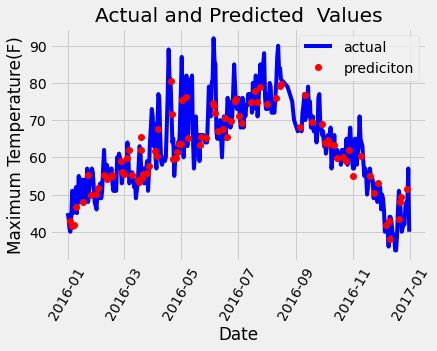

In [36]:
#创建表格保存真实数据
true_data=pd.DataFrame(data={'data':dates,'actual':labels})
#同理，创造一个表格保存日期和其相对应的模型预测值
months=test_features[:,feature_list.index('month')]
days=test_features[:,feature_list.index('day')]
years=test_features[:,feature_list.index('year')]
test_dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year,month,day in zip(years,months,days)]
test_dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in test_dates]
predictions_data=pd.DataFrame(data={'data':test_dates,'prediction':predictions})
#真实值
plt.plot(true_data['data'],true_data['actual'],'b-',label='actual')
#预测值
plt.plot(predictions_data['data'],predictions_data['prediction'],'ro',label='prediciton')
plt.xticks(rotation='60')
plt.legend()
#图名
plt.xlabel('Date')
plt.ylabel('Maximum Temperature(F)')
plt.title('Actual and Predicted  Values')